##**Ejercicio obligatorio SVM - Etchepareborda Baltazar Ariel**

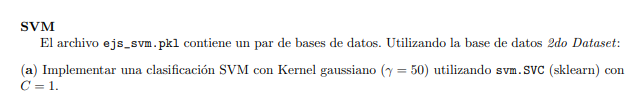

##**Importacion de datos y librerias, carga de datos por el formato diferente**

In [ ]:
#Descargo los datos con curl
!curl -L -o ejs_svm.pkl https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/main/data/ejs_svm.pkl
#Importo las librerias que voy a usar
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Abro el archivo
with open("ejs_svm.pkl", "rb") as f:
    datos = pickle.load(f)
#Veo cual se supone que es el segundo dataset.
print("Keys encontradas:", datos.keys())
d2 = datos["2do Dataset"]
print("Keys internas:", d2.keys())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15882  100 15882    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k
Keys encontradas: dict_keys(['1er Dataset', '2do Dataset'])
Keys internas: dict_keys(['X', 'y'])


Esto es en parte para mi asi entiendo bien el tema, pero de paso sirve como repaso teorico.
Que son las support vector machines?
SVM sirve para encontrar el hiperplano optimo para categorizar nuevos samples. Para el caso binario si tenemos un espacio de 3D, la superficie separadora es un hiperplano.


Es una tecnica de ajuste no lineal, busca maximizar el margen de clasificacion.

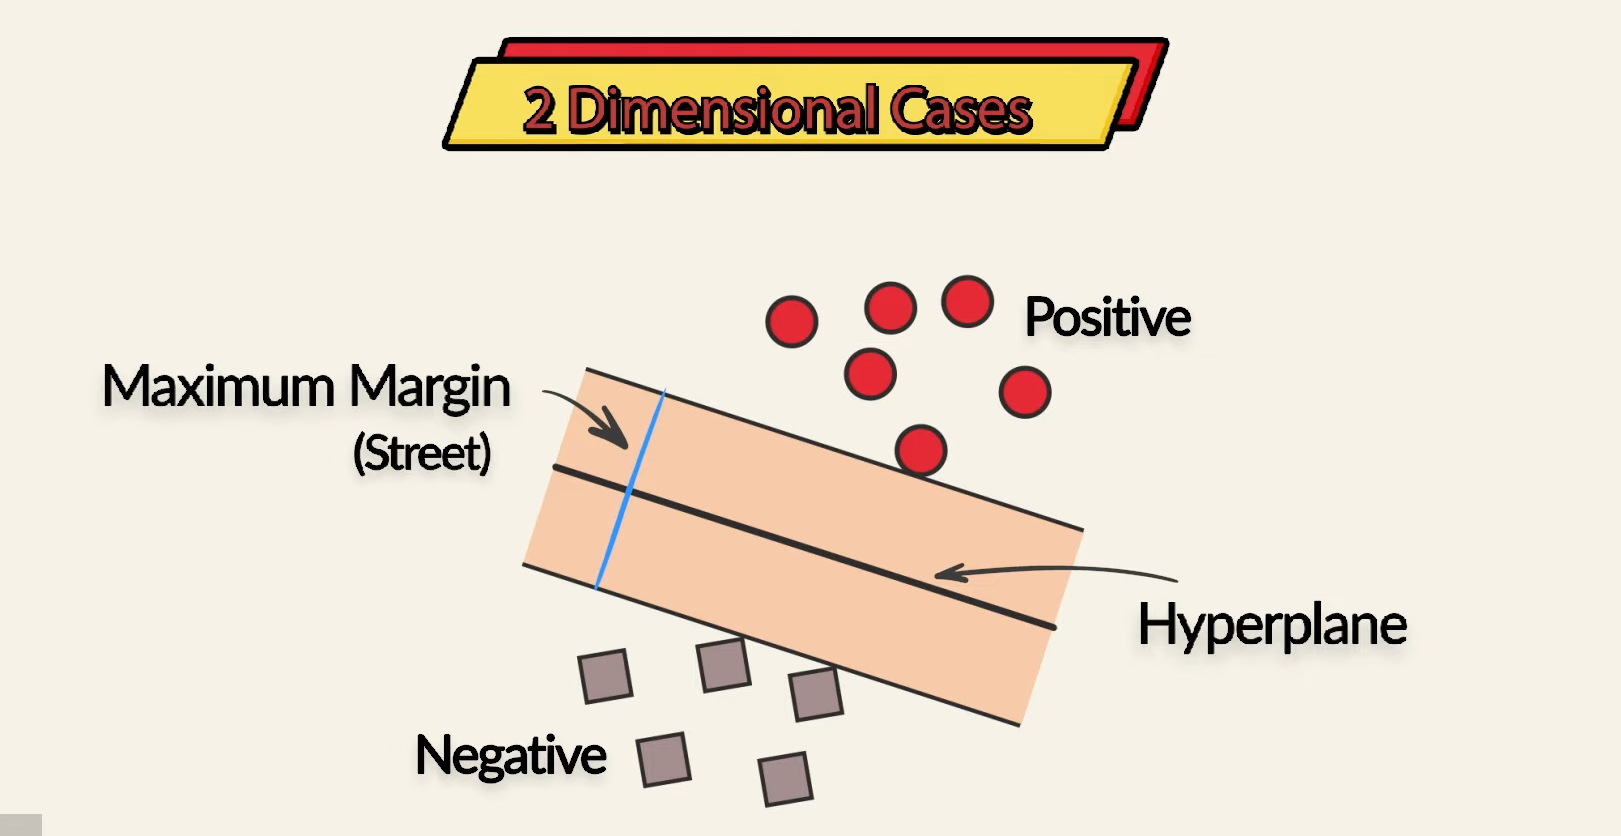

Los support vectors van a ser los puntos mas cerca de los margenes, que son los mas dificiles de clasificar. Los support vectors son los que definen la frontera de decision, no todos los datos.

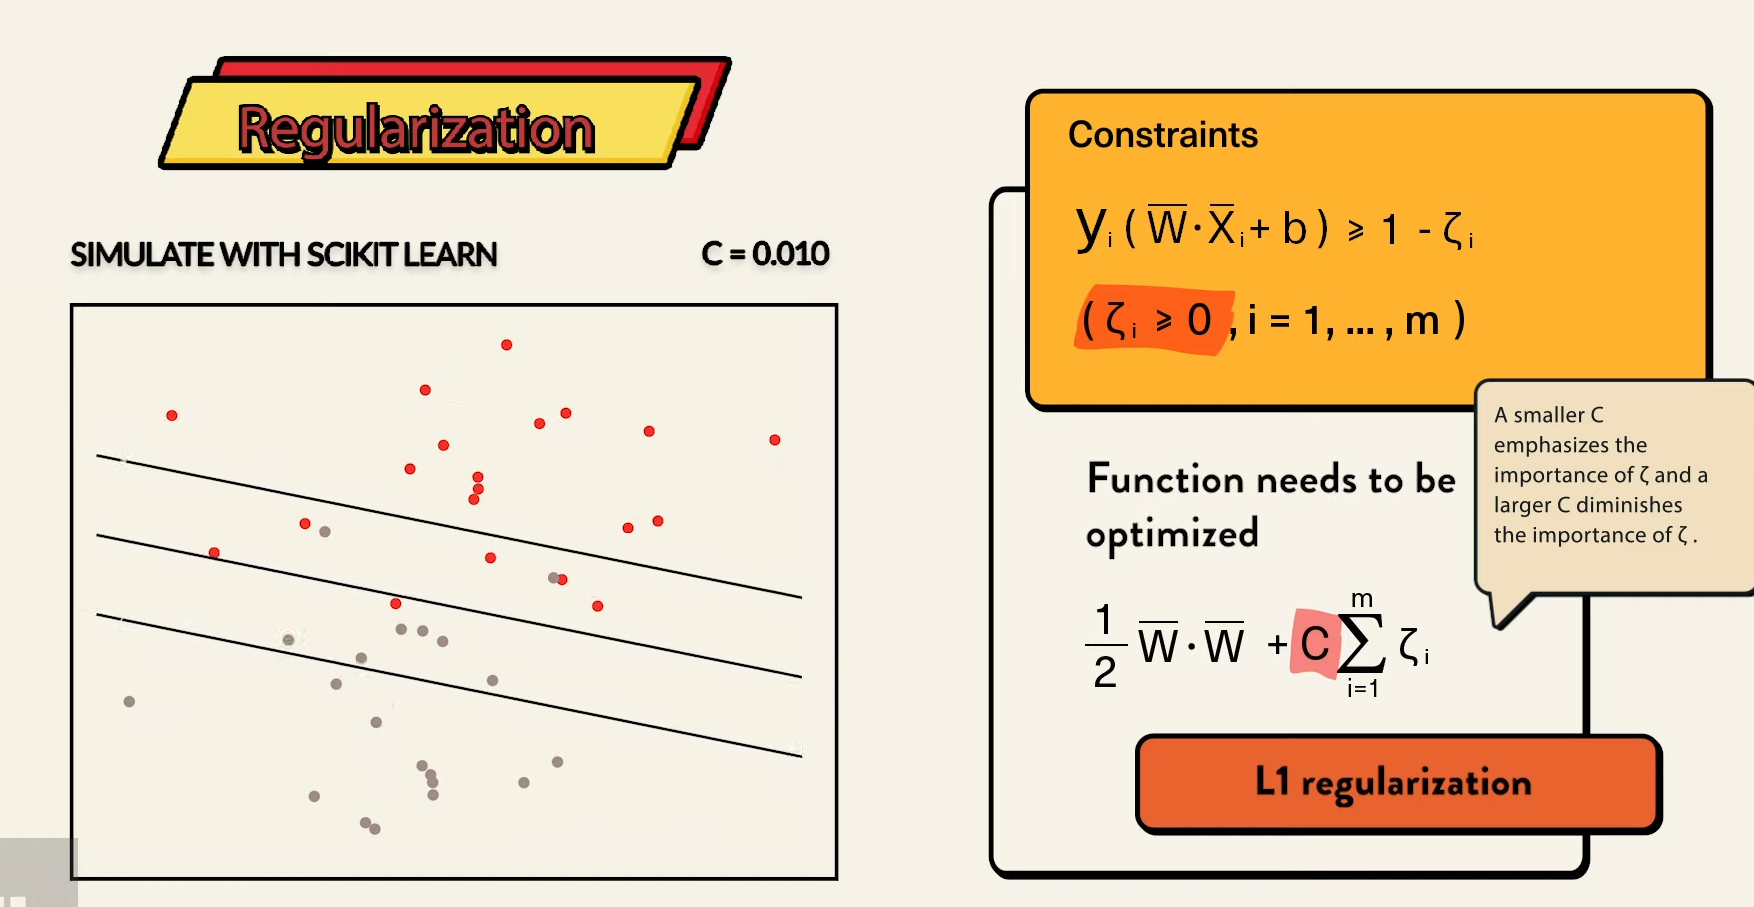

###**Armo funcion auxiliar para visualizar**

In [ ]:
#Defino funcion auxiliar para visualizar.
def plot_svm_2d(clf, X, y, title="SVM"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.25)

    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm,
                s=30, edgecolors="k")

    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], s=120, facecolors="none",
                edgecolors="k", linewidths=1.5, label="Support Vectors")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


(a) Implementar una clasificaci´on SVM con Kernel gaussiano (γ = 50) utilizando svm.SVC (sklearn) con
C = 1.

---

(b) Graficar la frontera de decisi´on y las curvas de vectores soportes sobre un scatter.


---
Junte los dos items porque deje la funcion para graficar a parte porque si no el codigo no se entiende.


Shape X: (863, 2)
Shape y: (863,)
Accuracy entrenamiento: 1.0
Cantidad vectores soporte: 525


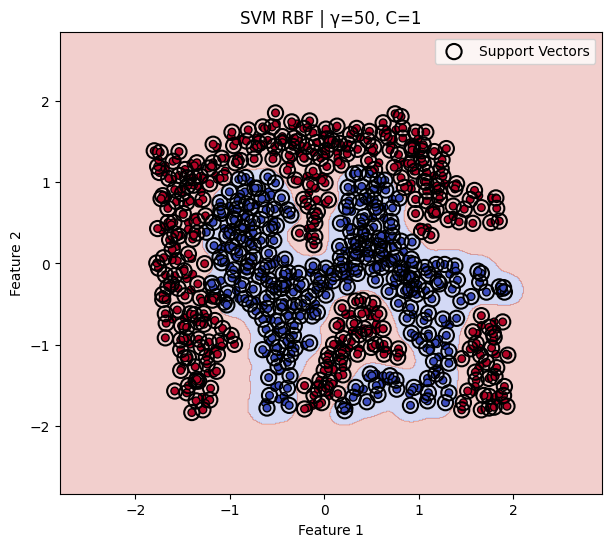

In [ ]:
#Saco X e Y,
X = d2["X"]
y = d2["y"].ravel()  #Aplano para que sea de (n,)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

#Normalizo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Grafico lo que me pedian en la consigna.
clf = SVC(kernel="rbf", gamma=50, C=1)
clf.fit(X_scaled, y)

print("Accuracy entrenamiento:", accuracy_score(y, clf.predict(X_scaled)))
print("Cantidad vectores soporte:", len(clf.support_))

plot_svm_2d(clf, X_scaled, y, title="SVM RBF | γ=50, C=1")


(c) Repetir para diferentes valores de C. Extraer conclusiones.

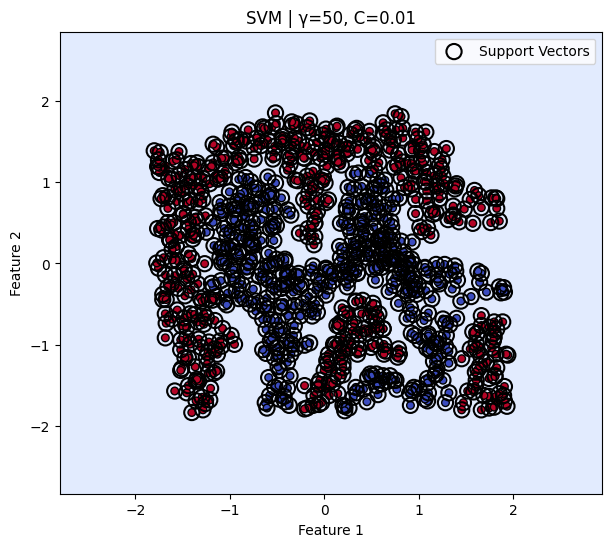

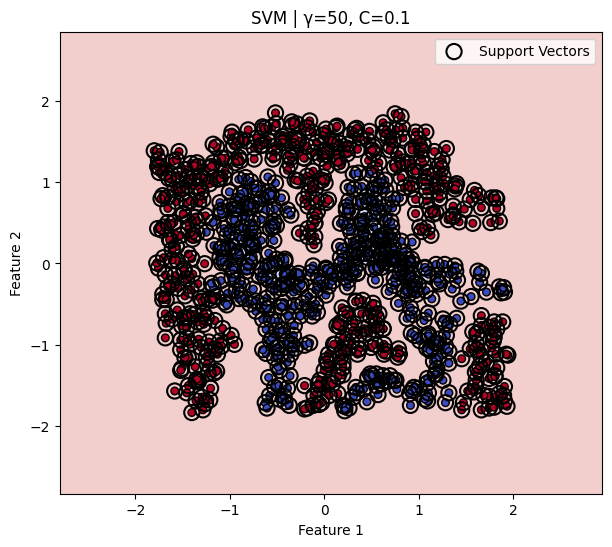

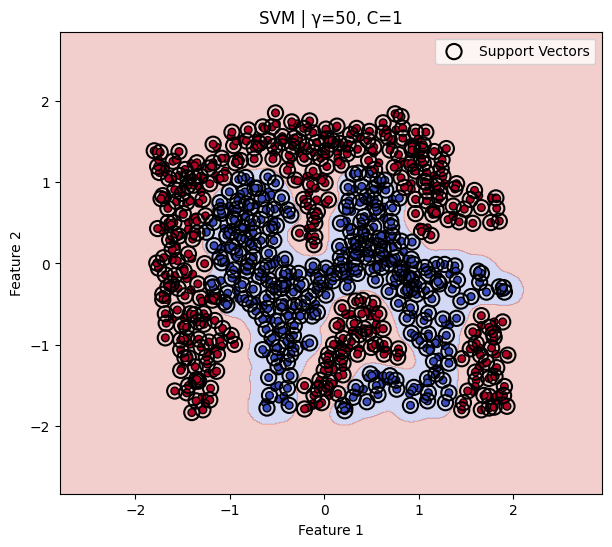

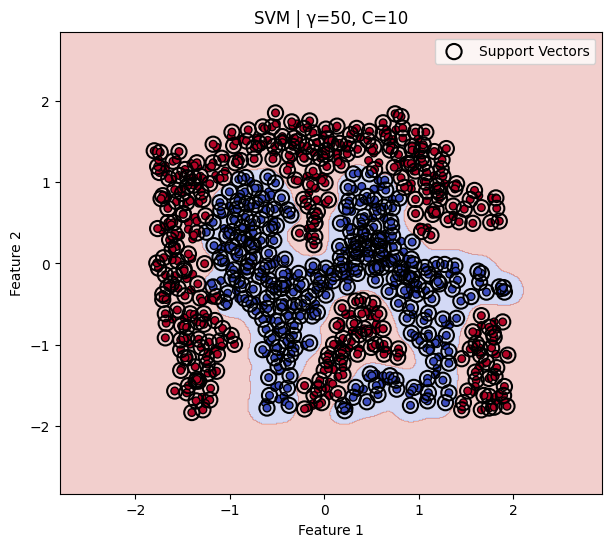

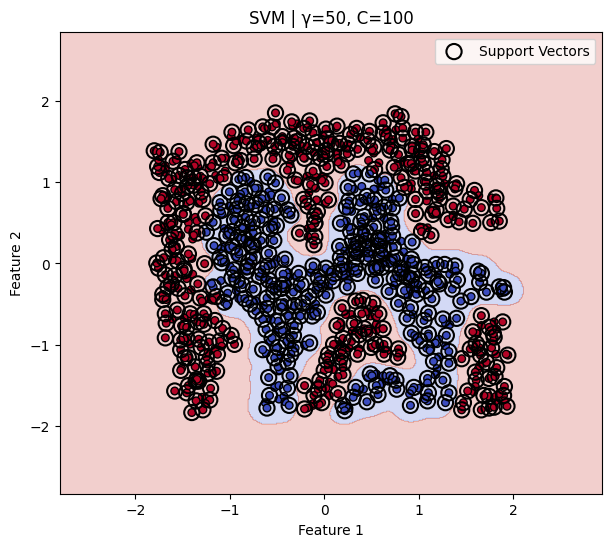


=== Resultados variando C ===
C=0.01 | accuracy=0.5562 | vectores soporte=815
C=0.1 | accuracy=0.7346 | vectores soporte=820
C=1 | accuracy=1.0000 | vectores soporte=525
C=10 | accuracy=1.0000 | vectores soporte=515
C=100 | accuracy=1.0000 | vectores soporte=515


In [ ]:
#Resultados variando C
C_values = [0.01, 0.1, 1, 10, 100]

resultados_C = []
#Hago el mismo fit para diferentes modelos de SVM con el C variable y los voy graficando y despues guardando los resultados.
for C in C_values:
    clf = SVC(kernel="rbf", gamma=50, C=C)
    clf.fit(X_scaled, y)
    acc = accuracy_score(y, clf.predict(X_scaled))
    n_sv = len(clf.support_)

    resultados_C.append((C, acc, n_sv))

    plot_svm_2d(clf, X_scaled, y, title=f"SVM | γ=50, C={C}")

print("\n=== Resultados variando C ===")
for C, acc, n_sv in resultados_C:
    print(f"C={C} | accuracy={acc:.4f} | vectores soporte={n_sv}")


##**Analisis de resultados para C variable**

El C define la penalizacion por error de clasificacion. Basicamente es que tan estricto es el modelo con los errores en los datos de entrenamiento. Se simplifica la frontera de decision, pero parece que hay mas riesgo de underfitting, como en el caso de C=0.01 donde basicamente todos los puntos son considerados puntos azules. Para valores pequeinos de C = 0.1 tampoco anda bien.


C=1 parece tener la mejor frontera entre todas las variaciones consideradas, permitiendo algunos errores pero ahora si penalizandolos.


Para valores muy elevados de C como C=100 el modelo traza una frontera practicamente perfecta y muy ajustada entre los datos (se ve como para puntos practicamente iguales azules y rojos esta la frontera de decision, porque no permite errores). Parece ser un caso de overfitting, no usaria valores de C tan elevados.

(d) Repetir para diferentes valores de γ. Extraer conclusiones.

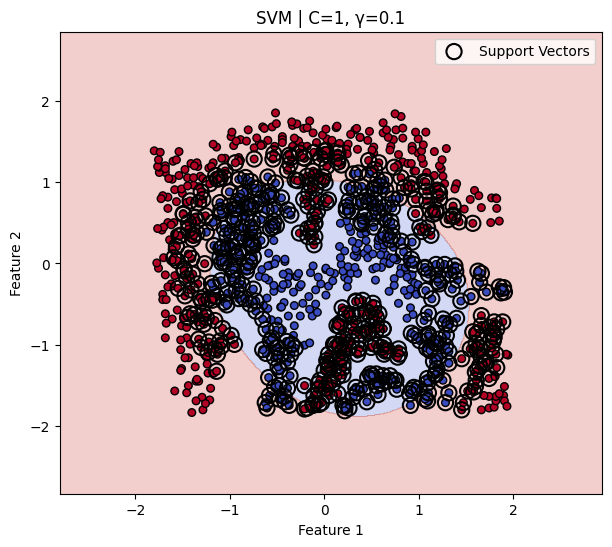

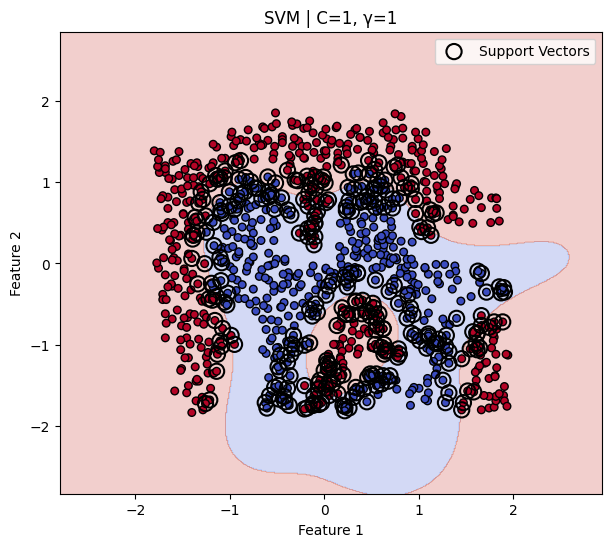

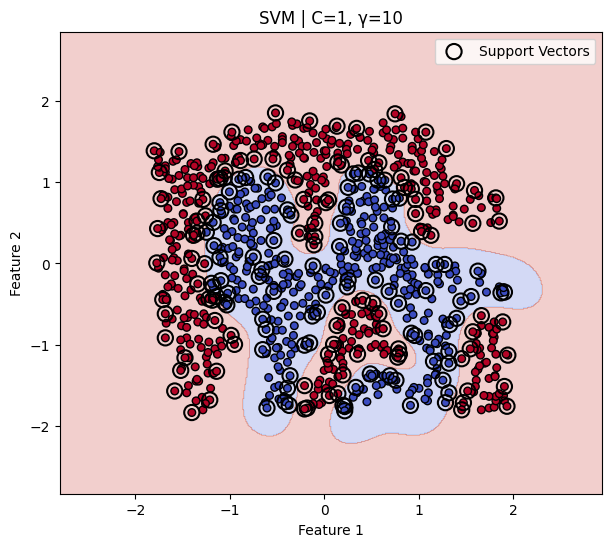

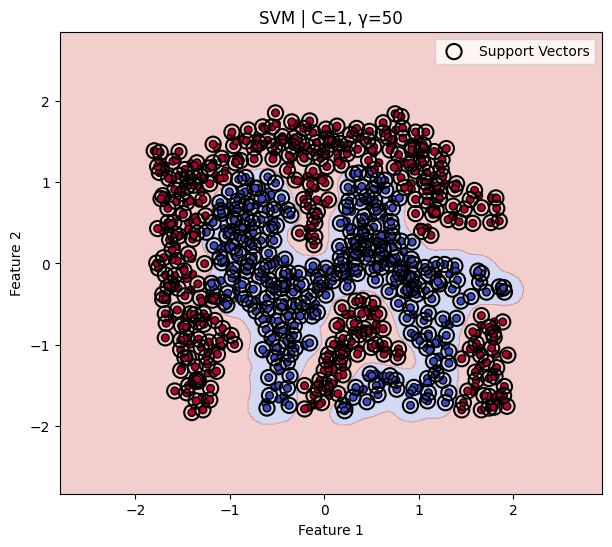

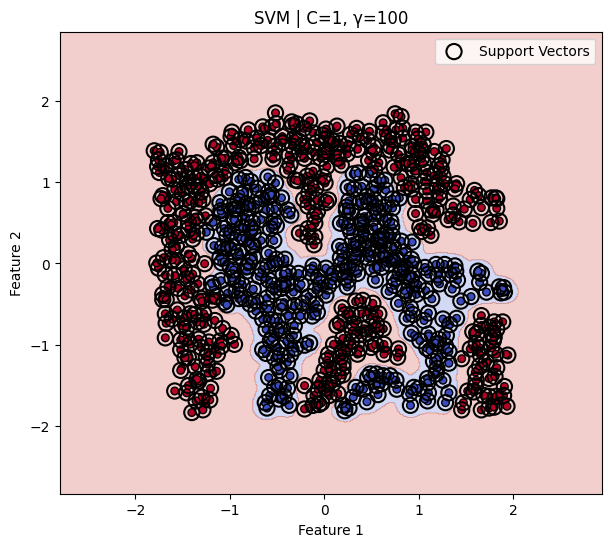


=== Resultados variando γ ===
γ=0.1 | accuracy=0.8216 | vectores soporte=498
γ=1 | accuracy=0.9432 | vectores soporte=294
γ=10 | accuracy=0.9988 | vectores soporte=184
γ=50 | accuracy=1.0000 | vectores soporte=525
γ=100 | accuracy=1.0000 | vectores soporte=713


In [ ]:
#Resultados variando gamma
gamma_values = [0.1, 1, 10, 50, 100]

resultados_gamma = []
#Hago el mismo fit para diferentes modelos de SVM con el gamma variable, los voy graficando y despues guardando los resultados.
for g in gamma_values:
    clf = SVC(kernel="rbf", gamma=g, C=1)
    clf.fit(X_scaled, y)
    acc = accuracy_score(y, clf.predict(X_scaled))
    n_sv = len(clf.support_)

    resultados_gamma.append((g, acc, n_sv))

    plot_svm_2d(clf, X_scaled, y, title=f"SVM | C=1, γ={g}")

print("\n=== Resultados variando γ ===")
for g, acc, n_sv in resultados_gamma:
    print(f"γ={g} | accuracy={acc:.4f} | vectores soporte={n_sv}")


##**Analisis de resultados para gamma variable**


El gamma controla hasta donde llega la influencia de un solo ejemplo en el entrenamiento, va multiplicando en la exponencial negativa a la distancia entre dos puntos.


Se ve que para gamma bajo, la frontera se ensancha porque en el centro hay mayor concentracion de puntos azules contra rojos y recien fuera del centro la frontera clasifica a los puntos rojos como rojos. Esto es porque en esa zona hay una influencia mayor de los puntos azules que definen el centro.


A medida que va subiendo el gamma se ve como se va moderando este ensanchamiento y se ajusta mejor a las fronteras que uno esperaria observando los datos, porque la distancia de influencia se reduce pero sigue siendo razonable. El mejor equilibrio parece estar en gamma 50, para gamma 100 ya parece pesar mucho mas el patron local y no tanto el patron general de los datos.


Para gamma bajo parece haber underfitting y para gamma muy alto mira solo los vecinos mas ceranos y se pierden los patrones, con overfitting.
